<a href="https://colab.research.google.com/github/LeonardChin2017/AzureDataUploadTemplate/blob/master/assignment1_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS5242 assignment 1: Get started with PyTorch

PyTorch is an open source machine learning framework on the [github](https://github.com/pytorch/pytorch). In this code tutorial we will learn the basic of PyTorch.

You can use Colab/your personal GPUs/any other resources to run our experiments.

In the case that you are not familiar with Colab: Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs:
1. Login Google Colab https://colab.research.google.com/
2. In this assignment, We **need GPU** to training the CNN model. You may need to **choose GPU in Runtime -> Change runtime type -> Hardware accerator**

> In this assignment, there is no need to use GPU.


### **Grades**
assignment 1 is composed of 10 points in all, consisting of several code completions and questions. For submission, you need to submit the notebook with output.

15% off per day late

0 score if you submit it 7 days after the deadline​

### **Format**
The question will be in the form:

===> Question: What is deep learning?  
===> Answer:  
Your answer here.

The code completion will be in the form:

\# === Complete the code

\# === Complete the code

### **Contact**

Please feel free to contact us if you have any question about this assignment or need any further information.

TA Email: E1154541@u.nus.edu

## Section 1: Environmental Setup

First, we need to install the PyTorch and check the pytorch version.

In [1]:
!pip3 install torch

import torch
torch.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

'2.6.0+cu124'

Here are some routines for importing and setting up torch.

In [2]:
# frequently used import
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt

# fix the random number so that the experiments are reproducible
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

The best referrence for pytorch is its [document](https://pytorch.org/docs/stable/index.html). PyTorch is well-known for a good community.

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.

In [3]:
!nvidia-smi

Sat Aug 16 08:28:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Here, you can see the memory and memory usage of the applied GPU. For my case, the applied one is a Tesla T4. The GPU applied may be different, but it is ok for our experiments.

Now let's create tensor, which is the basic element in PyTorch.

In [ ]:
x1 = torch.tensor(1.0) # tensor on CPU
x2 = torch.tensor(1.0, device="cuda:0") # tensor on GPU
x3 = torch.tensor(1.0, requires_grad=True).cuda() # tensor on GPU and require grad
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor(1.)
x2: tensor(1., device='cuda:0')
x3: tensor(1., device='cuda:0', grad_fn=<ToCopyBackward0>)


In [ ]:
x = torch.tensor(1.0)
print(x)
print(x.shape)
print(x.dtype)
print(x.device)
print(x.requires_grad)

tensor(1.)
torch.Size([])
torch.float32
cpu
False


In [ ]:
x.requires_grad_()
y = x + 1
print(y)
print(y.grad_fn)
print(y.grad)

tensor(2., grad_fn=<AddBackward0>)
None


/tmp/ipython-input-4193765114.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


## Section 2: Basic Usage

In [ ]:
# 2.1: Use autograd to calculate gradients

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
y = torch.tensor(4.)

# Build a computational graph.
pred = w * x + b
L = (pred - y)**2

# Compute gradients.
# === Complete the code (0.5')
L.backward()
# === Complete the code

# Print out the gradients.
print(x.grad)
print(w.grad)
print(b.grad)

tensor(4.)
tensor(2.)
tensor(2.)


In [ ]:
# 2.2 update parameters by gradient descent

# we want to update parameters w and b
lr = 0.01

# 1-step gradient descent
# === Complete the code (0.5')
with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()
# === Complete the code

# current loss
pred = w * x + b
L = (pred - y)**2

print(w)
print(b)
print(L)

tensor(1.9800, requires_grad=True)
tensor(2.9800, requires_grad=True)
tensor(0.9216, grad_fn=<PowBackward0>)


In [ ]:
# 2.3 update parameters by optimizer

# Use SGD optimizer
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 5-step gradient descent.
for t in range(5):
  pred = w * x + b
  L = (pred - y)**2
  optimizer.zero_grad()
  # === Complete the code (0.5')
  L.backward()
  optimizer.step()
  # === Complete the code

print(w)
print(b)
print(L)

tensor(1.8914, requires_grad=True)
tensor(2.8914, requires_grad=True)
tensor(0.6648, grad_fn=<PowBackward0>)


===> Question: Why do we need `optimizer.zero_grad()`? (0.5) What happens if we do not `zero_grad` in each step? (0.5')  
===> Answer:

We need optimizer.zero_grad() because in PyTorch, gradients accumulate by default. Each time you call L.backward(), the new gradients are added to the existing ones stored in w.grad and b.grad.

If we do not zero_grad in each step, the gradients from previous iterations will keep piling up, leading to wrong updates (the optimizer will think the slope is much larger than it actually is). This makes training unstable and the parameters (w, b) will not move in the correct direction.


===> Question: What's the meaning of `grad_fn=<PowBackward0>`? (0.5')  
===> Answer:
grad_fn=<PowBackward0> means that the tensor you see was created as the result of a power operation—in your case squaring (pred - y)**2—and PyTorch’s autograd system has attached a “backward function” to it so it knows how to compute gradients during backpropagation. In other words, instead of just being a plain number, this tensor carries with it a record of how it was produced, and the tag <PowBackward0> tells autograd, “when someone calls .backward(), I know the rule for differentiating a power operation and can propagate the gradient correctly through this part of the computation graph.”

In [ ]:
# 2.4 create tensors

shape = (2, 3)

# create an empty tensor
x = torch.empty(shape)
print(x)

# create a full-zero tensor with type long
# === Complete the code (0.5')
x = torch.zeros(shape, dtype=torch.long)
# === Complete the code
print(x)

# create a a tensor filled with random numbers from
# a uniform distribution on the interval [0, 1)
# === Complete the code (0.5')
x = torch.rand(shape)
# === Complete the code
print(x)

# create a tensor filled with random numbers from a standard normal distribution
# === Complete the code (0.5')
x = torch.randn(shape)
# === Complete the code
print(x)

# create a tensor from numpy
x = np.array([[1, 2], [3, 4]])
# === Complete the code (0.5')
x = torch.from_numpy(x)
# === Complete the code
print(x)

# convert a tensor to numpy
x = x.numpy()
print(x)

tensor([[9.3555e+08, 4.4672e-41, 7.5876e-13],
        [0.0000e+00, 4.4842e-44, 0.0000e+00]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
tensor([[ 1.2645, -0.6874,  0.1604],
        [-0.6065, -0.7831,  1.0622]])
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [ ]:
# 2.5 gradient of matrix and vector

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

# Forward pass.
pred = linear(x)

# Compute loss.
# === Complete the code (0.5')
loss = criterion(pred, y)
# === Complete the code
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
# === Complete the code (0.5')
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)
# === Complete the code

w:  Parameter containing:
tensor([[ 0.5431,  0.3890, -0.2517],
        [-0.1453, -0.5500, -0.0104]], requires_grad=True)
b:  Parameter containing:
tensor([-0.4348, -0.4453], requires_grad=True)
loss:  2.650336503982544
dL/dw:  tensor([[ 1.0951,  0.9776, -1.2607],
        [ 0.0268, -1.7639, -0.2130]])
dL/db:  tensor([-0.3936, -1.1098])


===> Question : What is the function of the above code? Do a shape check for the gradient computation above. (0.5')  
===> Answer:
The function of the code is to build a simple fully connected linear layer, run a forward pass with input x, compute the mean squared error loss against target y, and then use autograd to calculate the gradients of the loss with respect to the layer’s weights and biases. For the shape check: the weight has shape (2, 3) since the layer maps 3 inputs to 2 outputs, and therefore the gradient dL/dw also has shape (2, 3); the bias has shape (2,), so the gradient dL/db also has shape (2,).

## Section 3: Linear Regression


In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1

# Toy dataset
x_train = np.array([[3.2], [4.1], [5.6], [7.69], [6.3], [4.112],
                    [9.79], [5.182], [6.59], [3.167], [7.042],
                    [10.921], [5.268], [7.9], [3.0]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [ ]:
def main(learning_rate=0.001, num_epochs = 60):
  # Linear regression model
  model = nn.Linear(input_size, output_size)

  # Loss and optimizer
  criterion = nn.MSELoss()

  # Create SGD optimizer from torch
  # Hint: check manual for model.parameters
  # === Complete the code (0.5')
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  # === Complete the code

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      # === Complete the code (1')
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      # === Complete the code

      # Backward and optimize
      # === Complete the code (1')
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # === Complete the code

      if (epoch+1) % 5 == 0:
          print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

  # Plot the graph
  predicted = model(torch.from_numpy(x_train)).detach().numpy()
  plt.plot(x_train, y_train, 'ro', label='Original data')
  plt.plot(x_train, predicted, label='Fitted line')
  plt.legend()
  plt.show()

Epoch [5/60], Loss: 3.5557
Epoch [10/60], Loss: 1.5880
Epoch [15/60], Loss: 0.7714
Epoch [20/60], Loss: 0.4324
Epoch [25/60], Loss: 0.2917
Epoch [30/60], Loss: 0.2333
Epoch [35/60], Loss: 0.2090
Epoch [40/60], Loss: 0.1988
Epoch [45/60], Loss: 0.1946
Epoch [50/60], Loss: 0.1928
Epoch [55/60], Loss: 0.1920
Epoch [60/60], Loss: 0.1916


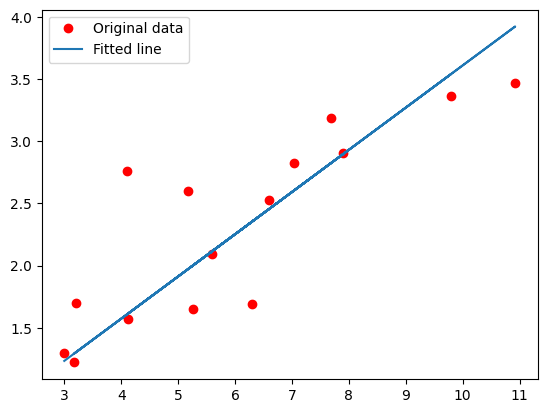

In [ ]:
main()

Now let's investigate into how learning rate affects the training process. (1')

===> Question: Experiments with different learning rates and num_epochs.   
When will the training diverges? What's your suggested value for the learning rate?   
Justify your answer by running more experiments (leaving the results in the notebook).     
===> Answer:

Epoch [5/60], Loss: 18.8152
Epoch [10/60], Loss: 17.3028
Epoch [15/60], Loss: 15.9129
Epoch [20/60], Loss: 14.6358
Epoch [25/60], Loss: 13.4621
Epoch [30/60], Loss: 12.3837
Epoch [35/60], Loss: 11.3926
Epoch [40/60], Loss: 10.4819
Epoch [45/60], Loss: 9.6450
Epoch [50/60], Loss: 8.8760
Epoch [55/60], Loss: 8.1693
Epoch [60/60], Loss: 7.5200


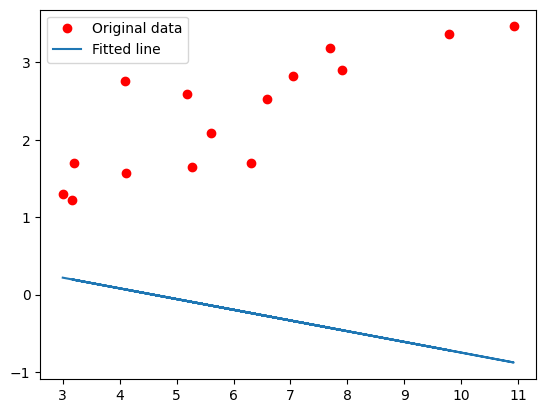

In [ ]:
# Try 1:
main(learning_rate=0.0001, num_epochs=60)

Epoch [5/60], Loss: 0.1716
Epoch [10/60], Loss: 0.1712
Epoch [15/60], Loss: 0.1709
Epoch [20/60], Loss: 0.1706
Epoch [25/60], Loss: 0.1704
Epoch [30/60], Loss: 0.1701
Epoch [35/60], Loss: 0.1698
Epoch [40/60], Loss: 0.1695
Epoch [45/60], Loss: 0.1693
Epoch [50/60], Loss: 0.1690
Epoch [55/60], Loss: 0.1688
Epoch [60/60], Loss: 0.1685


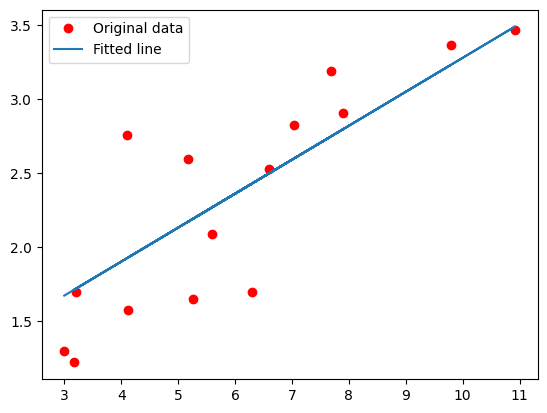

In [ ]:
# Try 2:
main(learning_rate=0.01, num_epochs=60)

Epoch [5/60], Loss: 13582782.0000
Epoch [10/60], Loss: 6861234951421952.0000
Epoch [15/60], Loss: 3465895909787286579970048.0000
Epoch [20/60], Loss: 1750770163157276282286575961767936.0000
Epoch [25/60], Loss: inf
Epoch [30/60], Loss: inf
Epoch [35/60], Loss: inf
Epoch [40/60], Loss: inf
Epoch [45/60], Loss: inf
Epoch [50/60], Loss: nan
Epoch [55/60], Loss: nan
Epoch [60/60], Loss: nan


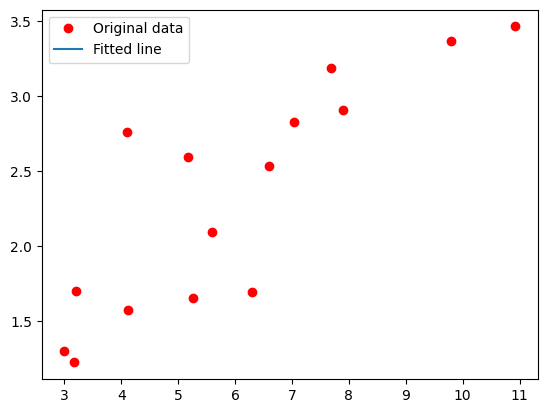

In [ ]:
# Try 3:
main(learning_rate=0.1, num_epochs=60)

Epoch [5/60], Loss: 126878115430400.0000
Epoch [10/60], Loss: 1742770234363519909790683758592.0000
Epoch [15/60], Loss: inf
Epoch [20/60], Loss: inf
Epoch [25/60], Loss: inf
Epoch [30/60], Loss: nan
Epoch [35/60], Loss: nan
Epoch [40/60], Loss: nan
Epoch [45/60], Loss: nan
Epoch [50/60], Loss: nan
Epoch [55/60], Loss: nan
Epoch [60/60], Loss: nan


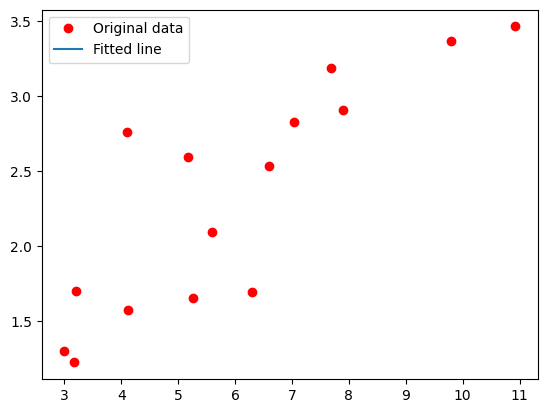

In [ ]:
# Try 4:
main(learning_rate=0.5, num_epochs=60)

In [ ]:
# you can run more tries or delete some tries above. After getting your conclusion, please write your answer in the following cell.